In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import sklearn.preprocessing
from scipy.linalg import eigh
from sklearn import decomposition
import seaborn as sns
from sklearn.manifold import TSNE


In [7]:
d = pd.read_csv('mnist_train.csv')

In [10]:
d.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y = d['label']

In [20]:
data= d.drop(labels = 'label',axis  =1)

In [30]:
demo = data.iloc[3].as_matrix().reshape(28,28)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


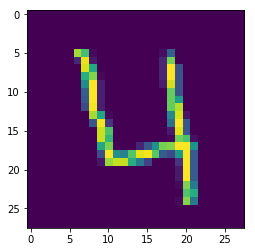

In [31]:
plt.imshow(demo)

In [32]:
y[3]

4

In [33]:
std_data = sklearn.preprocessing.StandardScaler().fit_transform(data)

In [35]:
covar_matrix = np.matmul(std_data.T,std_data)

In [37]:
covar_matrix.shape

(784, 784)

In [40]:
val,vec=eigh(covar_matrix,eigvals = (782,783))

In [47]:
vec.shape

(784, 2)

In [60]:
a = np.matmul(vec.T,std_data.T) #Projecting all of my datapoints on eigen vectors

In [61]:
a.shape

(2, 42000)

In [65]:
new_data=np.vstack((a,y)).T

In [67]:
new_data.shape

(42000, 3)

In [68]:
df = pd.DataFrame(new_data,columns = ['Principle1','Principle2','Label'])
df.head()

,Principle1,Principle2,Label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


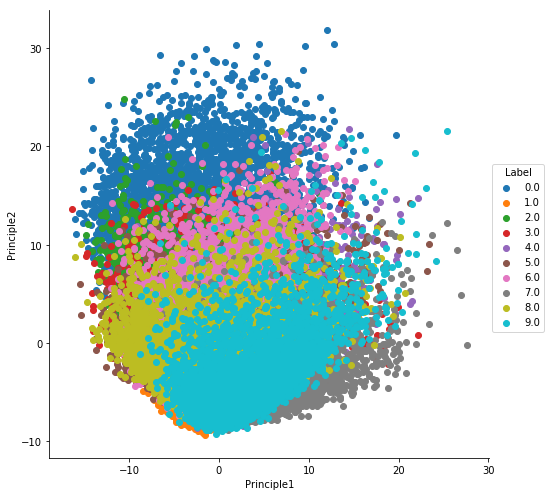

In [71]:
sns.FacetGrid(df,hue = "Label",size = 7).map(plt.scatter,'Principle1','Principle2').add_legend()

In [72]:
pca = decomposition.PCA()

In [87]:
pca.n_components = 2

In [88]:
new = pca.fit_transform(std_data)

In [89]:
new1= new.T

In [90]:
new1.shape

(2, 42000)

In [92]:
Data = np.vstack((new1,y)).T

In [94]:
df1 = pd.DataFrame(Data,columns = ["principle1","principle2","Label"])

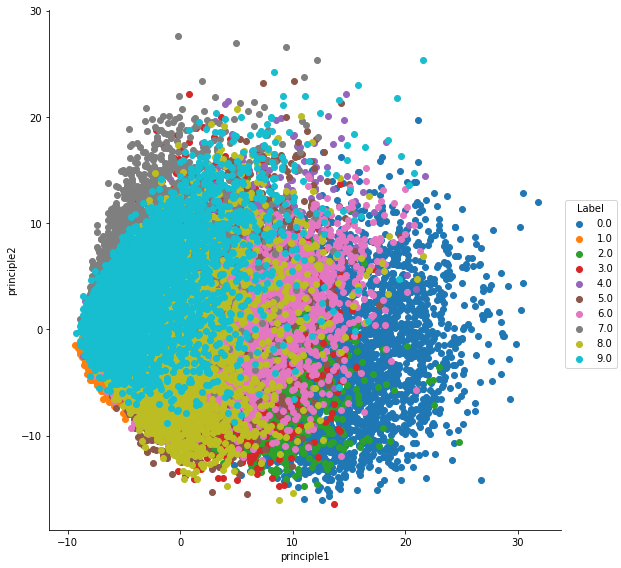

In [97]:
sns.FacetGrid(df1,hue = "Label",size = 8).map(plt.scatter,"principle1","principle2").add_legend()

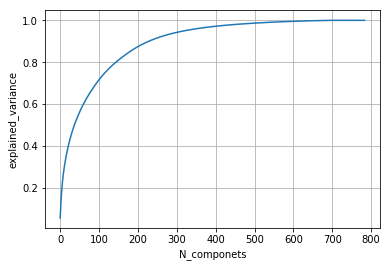

In [109]:
pca.n_components =784
pca.fit_transform(std_data)
var = pca.explained_variance_
pdf = var/sum(var)
cdf = np.cumsum(pdf)
plt.grid()
plt.xlabel('N_componets')
plt.ylabel('explained_variance')
plt.plot(cdf)

# T-SNE

In [112]:
model= TSNE(n_components=2).fit_transform(std_data)

In [116]:
model.shape

(42000, 2)

In [117]:
tsne_data = np.vstack((model.T,y)).T

In [120]:
tsne_data.shape

(42000, 3)

In [121]:
df2 = pd.DataFrame(tsne_data,columns = ["principle_1","principle_2","label"])

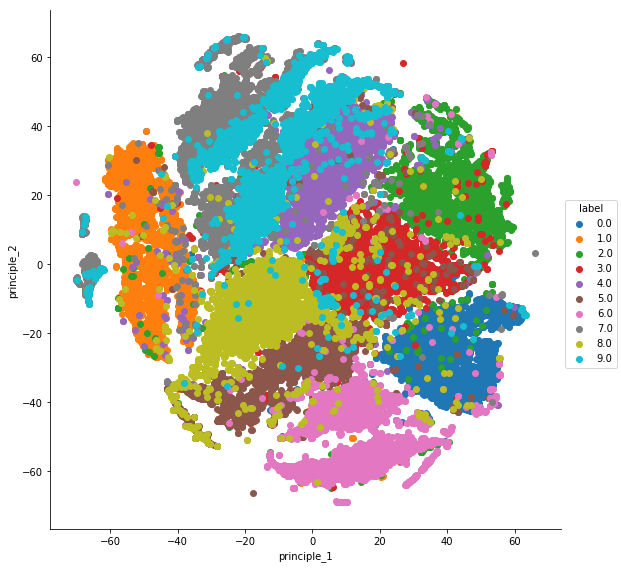

In [126]:
sns.FacetGrid(df2,hue = "label",size = 8).map(plt.scatter,'principle_1','principle_2').add_legend()

Could not do multiple hyperparameter testing due to slow computational speed. 